# Часть 0

In [1]:
import random
import numpy.random as rnd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from IPython.display import display

class FunctionWrapper:
    def __init__(self, name, f, a, b, e, der):
        self.f = f # function
        self.der = der # deriative
        self.a = a # bounds
        self.b = b #
        self.e = e # accuracy
        self.name = name
    def __str__(self):
        return self.name + " on " + "[" + str(self.a) + ", " + str(self.b) + "]"
        
        
class OptimizeResult:
    def __init__(self, method_name, f: FunctionWrapper, iterations, calls, result, data):
        self.iterations  = iterations
        self.method_name = method_name
        self.f           = f
        self.calls       = calls
        self.result      = result
        self.data        = data
       
    def __str__(self):
        return "Result of " + self.method_name + " for {" + str(self.f) + "} is " + str(self.result)

# Часть 1: методы одномерного поиска

## Метод дихотомии

In [2]:
def dichotomy(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("dichotomy", w, 0, 0, 0, [])
    
    d = random.uniform(0.2, 1.0) * (w.e / 2)
    
    a = w.a
    b = w.b
    while (b - a > w.e):
        result.data.append((a, b))
        x1 = (a + b) / 2 - d
        x2 = (a + b) / 2 + d
        y1 = w.f(x1)
        y2 = w.f(x2)
        
        if (y1 < y2):
            b = x2
        elif (y2 < y1):
            a = x1
        else:
            a = x1
            b = x2
        
        result.iterations += 1
        result.calls += 2

    result.result = (a + b) / 2
    return result

## Метод золотого сечения

In [3]:
def golden_ratio(w: FunctionWrapper) -> OptimizeResult:
    result = OptimizeResult("golden ratio", w, 0, 0, 0, [])
    
    a = w.a
    b = w.b
    if (b - a < w.e):
        result.result = (a + b) / 2
        return result
    
    gr = (math.sqrt(5) + 1) / 2
    
    x1 = b - (b - a) / gr
    x2 = a + (b - a) / gr

    y1 = w.f(x1)
    y2 = w.f(x2)
    result.calls += 2

    while (b - a > w.e):
        result.data.append((a, b))
        if (y1 < y2):
            b = x2
            (x2, y2) = (x1, y1)
            x1 = b - (b - a) / gr
            y1 = w.f(x1)
        else:
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + (b - a) / gr
            y2 = w.f(x2)
        
        result.iterations += 1
        result.calls += 1

    result.result = (a + b) / 2
    return result

## Метод Фибоначчи

In [4]:
def fibonacci(w: FunctionWrapper) -> OptimizeResult:
    def fib(i):
        (a, b) = (0, 1)
        for j in range(0, i):
            temp = b
            b += a
            a = temp
        return a
    def fib_greater(t):
        (a, b) = (0, 1)
        j = 0
        while True:
            if a > t:
                return j - 2
            temp = b
            b += a
            a = temp
            j += 1

    calls = fib_greater((w.b - w.a) / w.e)
    result = OptimizeResult("fibonacci", w, 0, calls, 0, [])

    n = calls   
    x1 = w.a + (w.b - w.a) * (fib(n - 2) / fib(n))
    x2 = w.a + (w.b - w.a) * (fib(n - 1) / fib(n))
    y1 = w.f(x1)
    y2 = w.f(x2)
    a = w.a
    b = w.b
    
    while (n > 1):
        result.data.append((a, b))
        result.iterations += 1
        n -= 1
        if (y1 > y2):
            a = x1
            (x1, y1) = (x2, y2)
            x2 = a + b - x1
            y2 = w.f(x2)
        else:
            b = x2
            (x2, y2) = (x1, y1)
            x1 = a + b - x2
            y1 = w.f(x1)

    result.result = (x1 + x2) / 2
    return result

## Test

In [5]:
for eps in [0.01, 0.0005, 0.00000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("(x + 1)^2 + 2", 
                        lambda x: (x + 1) ** 2 + 2, 
                        -100, 100, eps, None)

    print(dichotomy(f))
    print(golden_ratio(f))
    print(fibonacci(f))
    print()

Eps = 0.01
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.9994225822555667
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9957975517116466

Eps = 0.0005
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -0.999926650557136
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999496256596083
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -1.0004174769205463

Eps = 1e-08
Result of dichotomy for {(x + 1)^2 + 2 on [-100, 100]} is -1.0000000008836478
Result of golden ratio for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999999866804884
Result of fibonacci for {(x + 1)^2 + 2 on [-100, 100]} is -0.9999786485009068



## Report

In [6]:
def report1(w: FunctionWrapper):
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        res_d = dichotomy(w)
        res_g = golden_ratio(w)
        res_f = fibonacci(w)
        
        m = max(res_d.iterations, res_g.iterations, res_f.iterations)
        values = [["None", "None", "None"] for i in range(0, m)]
        
        for i in range(0, m):
            for a in [(0, res_d), (1, res_g), (2, res_f)]:
                (ind, d) = a
                if i < len(d.data):
                    values[i][ind] = str(d.data[i])
        print("EPS: " + str(eps))
        display(pd.DataFrame(values, columns = [
            res_d.method_name + " (calls: " + str(res_d.calls) + ")", 
            res_g.method_name + " (calls: " + str(res_g.calls) + ")", 
            res_f.method_name + " (calls: " + str(res_f.calls) + ")"
        ]))

In [7]:
report1(FunctionWrapper("(x + 1)^2 + 2", lambda x: (x + 1) ** 2 + 2, -100, 100, 0, None))

EPS: 0.1


,dichotomy (calls: 28),golden ratio (calls: 18),fibonacci (calls: 16)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.04165317585879759)","(-100, 23.606797749978966)","(-100, 23.60688956433637)"
2,"(-50.0208265879294, 0.04165317585879759)","(-52.78640450004205, 23.606797749978966)","(-52.78622087132726, 23.60688956433637)"
3,"(-25.0312398818941, 0.04165317585879759)","(-23.606797749978966, 23.606797749978966)","(-23.60688956433637, 23.60688956433637)"
4,"(-12.536446528876448, 0.04165317585879759)","(-23.606797749978966, 5.572809000084121)","(-23.60688956433637, 5.572441742654519)"
5,"(-6.289049852367623, 0.04165317585879759)","(-12.461179749810725, 5.572809000084121)","(-12.462006079027333, 5.572441742654519)"
6,"(-3.16535151411321, 0.04165317585879759)","(-5.572809000084121, 5.572809000084121)","(-5.572441742654519, 5.572441742654519)"
7,"(-1.603502344986004, 0.04165317585879759)","(-5.572809000084121, 1.3155617496424838)","(-5.572441742654519, 1.3171225937182953)"
8,"(-1.603502344986004, -0.7392714087048056)","(-2.941685500799153, 1.3155617496424838)","(-2.938196555217928, 1.3171225937182953)"
9,"(-1.2130400527042025, -0.7392714087048056)","(-2.941685500799153, -0.31056200151418567)","(-2.938196555217928, -0.30395136778133747)"


EPS: 0.01


,dichotomy (calls: 34),golden ratio (calls: 23),fibonacci (calls: 21)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 0.00376046325075562)","(-100, 23.606797749978966)","(-100, 23.6067970034716)"
2,"(-50.00188023162538, 0.00376046325075562)","(-52.78640450004205, 23.606797749978966)","(-52.7864059930568, 23.6067970034716)"
3,"(-25.002820347438067, 0.00376046325075562)","(-23.606797749978966, 23.606797749978966)","(-23.6067970034716, 23.6067970034716)"
4,"(-12.50329040534441, 0.00376046325075562)","(-23.606797749978966, 5.572809000084121)","(-23.6067970034716, 5.5728119861136065)"
5,"(-6.2535254342975835, 0.00376046325075562)","(-12.461179749810725, 5.572809000084121)","(-12.461173031244385, 5.5728119861136065)"
6,"(-3.1286429487741696, 0.00376046325075562)","(-5.572809000084121, 5.572809000084121)","(-5.5728119861136065, 5.5728119861136065)"
7,"(-1.5662017060124624, 0.00376046325075562)","(-5.572809000084121, 1.3155617496424838)","(-5.5728119861136065, 1.3155490590171723)"
8,"(-1.5662017060124624, -0.7774601581300978)","(-2.941685500799153, 1.3155617496424838)","(-2.941713868079262, 1.3155490590171723)"
9,"(-1.1755913953220356, -0.7774601581300978)","(-2.941685500799153, -0.31056200151418567)","(-2.941713868079262, -0.31061575004491715)"


EPS: 0.0001


,dichotomy (calls: 44),golden ratio (calls: 33),fibonacci (calls: 30)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 1.638171126181452e-05)","(-100, 23.606797749978966)","(-100, 23.60679775010817)"
2,"(-50.00000819085563, 1.638171126181452e-05)","(-52.78640450004205, 23.606797749978966)","(-52.78640449978366, 23.60679775010817)"
3,"(-25.000012286283447, 1.638171126181452e-05)","(-23.606797749978966, 23.606797749978966)","(-23.60679775010817, 23.60679775010817)"
4,"(-12.500014333997354, 1.638171126181452e-05)","(-23.606797749978966, 5.572809000084121)","(-23.60679775010817, 5.5728089995673145)"
5,"(-6.250015357854308, 1.638171126181452e-05)","(-12.461179749810725, 5.572809000084121)","(-12.461179750973542, 5.5728089995673145)"
6,"(-3.125015869782785, 1.638171126181452e-05)","(-5.572809000084121, 5.572809000084121)","(-5.5728089995673145, 5.5728089995673145)"
7,"(-1.5625161257470233, 1.638171126181452e-05)","(-5.572809000084121, 1.3155617496424838)","(-5.5728089995673145, 1.3155617518389136)"
8,"(-1.5625161257470233, -0.7812334903066189)","(-2.941685500799153, 1.3155617496424838)","(-2.9416854958894874, 1.3155617518389136)"
9,"(-1.1718911897380828, -0.7812334903066189)","(-2.941685500799153, -0.31056200151418567)","(-2.9416854958894874, -0.31056199221166025)"


EPS: 1e-06


,dichotomy (calls: 62),golden ratio (calls: 42),fibonacci (calls: 40)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 4.522907969236763e-07)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.0000002261454, 4.522907969236763e-07)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004204, 23.60679774997898)"
3,"(-25.0000003392181, 4.522907969236763e-07)","(-23.606797749978966, 23.606797749978966)","(-23.60679774997898, 23.60679774997898)"
4,"(-12.500000395754448, 4.522907969236763e-07)","(-23.606797749978966, 5.572809000084121)","(-23.60679774997898, 5.572809000084078)"
5,"(-6.250000424022622, 4.522907969236763e-07)","(-12.461179749810725, 5.572809000084121)","(-12.461179749810825, 5.572809000084078)"
6,"(-3.1250004381567096, 4.522907969236763e-07)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084078, 5.572809000084078)"
7,"(-1.5625004452237532, 4.522907969236763e-07)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084078, 1.3155617496426686)"
8,"(-1.5625004452237532, -0.7812495441756813)","(-2.941685500799153, 1.3155617496424838)","(-2.941685500798741, 1.3155617496426686)"
9,"(-1.171875446990514, -0.7812495441756813)","(-2.941685500799153, -0.31056200151418567)","(-2.941685500798741, -0.31056200151340363)"


EPS: 1e-07


,dichotomy (calls: 64),golden ratio (calls: 47),fibonacci (calls: 45)
0,"(-100, 100)","(-100, 100)","(-100, 100)"
1,"(-100, 2.6359212268851612e-08)","(-100, 23.606797749978966)","(-100, 23.60679774997898)"
2,"(-50.0000000131796, 2.6359212268851612e-08)","(-52.78640450004205, 23.606797749978966)","(-52.78640450004205, 23.60679774997898)"
3,"(-25.00000001976941, 2.6359212268851612e-08)","(-23.606797749978966, 23.606797749978966)","(-23.606797749978966, 23.60679774997898)"
4,"(-12.50000002306431, 2.6359212268851612e-08)","(-23.606797749978966, 5.572809000084121)","(-23.606797749978966, 5.572809000084121)"
5,"(-6.2500000247117615, 2.6359212268851612e-08)","(-12.461179749810725, 5.572809000084121)","(-12.46117974981074, 5.572809000084121)"
6,"(-3.1250000255354866, 2.6359212268851612e-08)","(-5.572809000084121, 5.572809000084121)","(-5.572809000084106, 5.572809000084121)"
7,"(-1.5625000259473496, 2.6359212268851612e-08)","(-5.572809000084121, 1.3155617496424838)","(-5.572809000084106, 1.3155617496425265)"
8,"(-1.5625000259473496, -0.7812499734348564)","(-2.941685500799153, 1.3155617496424838)","(-2.9416855007990677, 1.3155617496425265)"
9,"(-1.1718750260503155, -0.7812499734348564)","(-2.941685500799153, -0.31056200151418567)","(-2.9416855007990677, -0.3105620015140289)"


In [8]:
report1(FunctionWrapper("(x - 1)^2 - 1", lambda x: x ** 4 - 1, -100, 1000, 0, None))

EPS: 0.1


,dichotomy (calls: 30),golden ratio (calls: 22),fibonacci (calls: 20)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0310392400598)","(-100, 579.8373876248843)","(-100, 579.8373983739838)"
2,"(-100, 175.04655886008968)","(-100, 320.1626123751157)","(-100, 320.1626016260162)"
3,"(-100, 37.55431867010463)","(-100, 159.6747752497687)","(-100, 159.67479674796755)"
4,"(-31.25387990500748, 37.55431867010463)","(-100, 60.48783712534703)","(-100, 60.48780487804868)"
5,"(-31.25387990500748, 3.1812586226083677)","(-38.699100999074645, 60.48783712534703)","(-38.69918699187019, 60.48780487804868)"
6,"(-14.06734988125935, 3.1812586226083677)","(-38.699100999074645, 22.601798001850696)","(-38.69918699187019, 22.601626016259615)"
7,"(-5.474084869385284, 3.1812586226083677)","(-15.284241121645636, 22.601798001850696)","(-15.284552845529447, 22.601626016259615)"
8,"(-1.1774523634482519, 3.1812586226083677)","(-15.284241121645636, 8.13061875578337)","(-15.284552845529447, 8.130081300811298)"
9,"(-1.1774523634482519, 1.0329423696398514)","(-6.340560490283952, 8.13061875578337)","(-6.341463414637019, 8.130081300811298)"


EPS: 0.01


,dichotomy (calls: 42),golden ratio (calls: 27),fibonacci (calls: 24)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0046564950942)","(-100, 579.8373876248843)","(-100, 579.8373878536921)"
2,"(-100, 175.00698474264127)","(-100, 320.1626123751157)","(-100, 320.16261214630777)"
3,"(-100, 37.5081488664148)","(-100, 159.6747752497687)","(-100, 159.67477570738436)"
4,"(-31.250582061886767, 37.5081488664148)","(-100, 60.48783712534703)","(-100, 60.48783643892341)"
5,"(-31.250582061886767, 3.133439897358184)","(-38.699100999074645, 60.48783712534703)","(-38.69910282953754, 60.48783643892341)"
6,"(-14.06322757735846, 3.133439897358184)","(-38.699100999074645, 22.601798001850696)","(-38.69910282953754, 22.601794340924926)"
7,"(-5.469550335094305, 3.133439897358184)","(-15.284241121645636, 22.601798001850696)","(-15.284247757073558, 22.601794340924926)"
8,"(-1.172711713962228, 3.133439897358184)","(-15.284241121645636, 8.13061875578337)","(-15.284247757073558, 8.13060731539042)"
9,"(-1.172711713962228, 0.9850205867921453)","(-6.340560490283952, 8.13061875578337)","(-6.340579710144084, 8.13060731539042)"


EPS: 0.0001


,dichotomy (calls: 46),golden ratio (calls: 36),fibonacci (calls: 34)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000243341081)","(-100, 579.8373876248843)","(-100, 579.8373876248994)"
2,"(-100, 175.00003650116216)","(-100, 320.1626123751157)","(-100, 320.16261237510054)"
3,"(-100, 37.50004258468918)","(-100, 159.6747752497687)","(-100, 159.67477524979887)"
4,"(-31.250003041763513, 37.50004258468918)","(-100, 60.48783712534703)","(-100, 60.48783712530167)"
5,"(-31.250003041763513, 3.125044105570938)","(-38.699100999074645, 60.48783712534703)","(-38.69910099919554, 60.48783712530167)"
6,"(-14.06250380220439, 3.125044105570938)","(-38.699100999074645, 22.601798001850696)","(-38.69910099919554, 22.601798001608927)"
7,"(-5.46875418242483, 3.125044105570938)","(-15.284241121645636, 22.601798001850696)","(-15.284241122083813, 22.601798001608927)"
8,"(-1.1718793725350491, 3.125044105570938)","(-15.284241121645636, 8.13061875578337)","(-15.284241122083813, 8.13061875502791)"
9,"(-1.1718793725350491, 0.9766067006260479)","(-6.340560490283952, 8.13061875578337)","(-6.340560491553106, 8.13061875502791)"


EPS: 1e-06


,dichotomy (calls: 40),golden ratio (calls: 46),fibonacci (calls: 43)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.0000004130318)","(-100, 579.8373876248843)","(-100, 579.8373876248843)"
2,"(-100, 175.00000061954765)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.500000722805595)","(-100, 159.6747752497687)","(-100, 159.67477524976863)"
4,"(-31.25000005162897, 37.500000722805595)","(-100, 60.48783712534703)","(-100, 60.48783712534703)"
5,"(-31.25000005162897, 3.125000748620081)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074574, 60.48783712534703)"
6,"(-14.062500064536213, 3.125000748620081)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074574, 22.601798001850852)"
7,"(-5.4687500709898345, 3.125000748620081)","(-15.284241121645636, 22.601798001850696)","(-15.284241121645323, 22.601798001850852)"
8,"(-1.1718750742166453, 3.125000748620081)","(-15.284241121645636, 8.13061875578337)","(-15.284241121645323, 8.130618755783928)"
9,"(-1.1718750742166453, 0.9765632502334864)","(-6.340560490283952, 8.13061875578337)","(-6.340560490282996, 8.130618755783928)"


EPS: 1e-07


,dichotomy (calls: 40),golden ratio (calls: 51),fibonacci (calls: 48)
0,"(-100, 1000)","(-100, 1000)","(-100, 1000)"
1,"(-100, 450.00000002737534)","(-100, 579.8373876248843)","(-100, 579.8373876248844)"
2,"(-100, 175.00000004106298)","(-100, 320.1626123751157)","(-100, 320.16261237511566)"
3,"(-100, 37.50000004790681)","(-100, 159.6747752497687)","(-100, 159.67477524976874)"
4,"(-31.250000003421913, 37.50000004790681)","(-100, 60.48783712534703)","(-100, 60.487837125346914)"
5,"(-31.250000003421913, 3.125000049617767)","(-38.699100999074645, 60.48783712534703)","(-38.699100999074915, 60.487837125346914)"
6,"(-14.06250000427739, 3.125000049617767)","(-38.699100999074645, 22.601798001850696)","(-38.699100999074915, 22.60179800185017)"
7,"(-5.468750004705131, 3.125000049617767)","(-15.284241121645636, 22.601798001850696)","(-15.284241121646573, 22.60179800185017)"
8,"(-1.171875004919001, 3.125000049617767)","(-15.284241121645636, 8.13061875578337)","(-15.284241121646573, 8.130618755781768)"
9,"(-1.171875004919001, 0.9765625497247016)","(-6.340560490283952, 8.13061875578337)","(-6.340560490286634, 8.130618755781768)"


## Метод дихотомии сходится быстрее, но при этом количество вызовов функции у него сильно больше при больших eps
## Метод Фибоначчи на тестовых функциях всегда сходится быстрее и количество вызовов функции у него меньше чем у метода золотого сечения

# Часть 2. Градиентный спуск

In [9]:
def grad_descent(f: FunctionWrapper, t, start) -> OptimizeResult:
    def grad_move(xfrom, step, f):
        temp = list(xfrom)
        for i in range(len(temp)):
            temp[i] -= step * f.der[i](*xfrom)
        return tuple(temp) 
    def tuple_eq(h, g, e):
        t1 = list(h)
        t2 = list(g)
        for i in range(len(t1)):
            if (abs(t1[i] - t2[i]) > e):
                return False
        return True
    
    result = OptimizeResult("grad descent", f, 0, 0, 0, [])
    x = start
    while result.iterations < 10000:
        result.iterations += 1
        result.data.append(x)
        
        opt = FunctionWrapper("", lambda y: f.f(*grad_move(x, y, f)), 
                              0, 1e4, f.e, None)
        
        if t == "fibo":
            alpha = fibonacci(opt).result
        elif t == "dicho":
            alpha = dichotomy(opt).result
        elif t == "golden":
            alpha = golden_ratio(opt).result
        else:
            alpha = 2 * f.e
            
        new_x = grad_move(x, alpha, f)
        
        #print((x, new_x, alpha))
        if tuple_eq(x, new_x, f.e):
            break
        x = new_x
    result.result = x
    return result

## Test

In [10]:
for eps in [0.01, 0.0005, 0.000001]:  
    print("Eps = " + str(eps))
    f = FunctionWrapper("x ^ 2 + 10 * y ^ 2", 
                        lambda x, y: x ** 2 + 10 * y ** 2, 
                        -math.inf, math.inf, eps,
                        [
                            lambda x, y: 2 * x,
                            lambda x, y: 20 * y,
                        ])

    print(grad_descent(f, "fixed", (10, 10)))
    print(grad_descent(f, "fibo", (10, 10)))
    print(grad_descent(f, "dicho", (10, 10)))
    print(grad_descent(f, "golden", (10, 10)))
    print()

Eps = 0.01
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.24360276117225246, 6.482817337415909e-20)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.008704846864765359, -0.003427077617324621)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.009407480849218164, -0.007140033423027874)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0028684190109541235, 0.00404080978742272)

Eps = 0.0005
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.24979721530363086, 6.75550004588713e-16)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0015938574609403783, 0.00029319120807518213)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.00013622254858554686, 0.0001835529353923448)
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is (0.0001428124093631228, 0.000142532250873908)

Eps = 1e-06
Result of grad descent for {x ^ 2 + 10 * y ^ 2 on [-inf, inf]} is 

## Report (количество итераций)

In [11]:
def report2(w: FunctionWrapper):
    values = []
    for eps in [1e-1, 1e-2, 1e-4, 1e-6, 1e-7]:
        w.e = eps
        a1 = grad_descent(f, "fixed", (10, 10)).iterations
        a2 = grad_descent(f, "fibo", (10, 10)).iterations
        a3 = grad_descent(f, "dicho", (10, 10)).iterations
        a4 = grad_descent(f, "golden", (10, 10)).iterations
        
        values.append([eps, a1, a2, a3, a4])
    display(pd.DataFrame(values, columns = [
        "eps", "fixed", "fibonacci", "dichotomy", "golden"
    ]))

In [12]:
report2(FunctionWrapper(
            "x ^ 3 + 10 * y ^ 2", 
            lambda x, y: x ** 3 + 10 * y ** 2, 
            -math.inf, math.inf, 0,
            [
                lambda x, y: 3 * x ** 2,
                lambda x, y: 20 * y,
            ])
       )

,eps,fixed,fibonacci,dichotomy,golden
0,1.000000e-01,10000,27,15,15
1,1.000000e-02,10000,27,15,15
2,1.000000e-04,10000,27,15,15
3,1.000000e-06,10000,27,15,15
4,1.000000e-07,10000,27,15,15


# Часть 3. Градиентный спуск (квадратичные функции)

In [13]:
def trajectory(plot_name, func, x1, y1, x2, y2, grad_data):
    npts = 500
    RGB = 25

    x = rnd.uniform(x1, y1, npts)
    y = rnd.uniform(x2, y2, npts)
    z = func(x, y)

    fig = plt.figure(figsize=(16,8))

    fig.suptitle(plot_name, fontsize=26)
    # contour
    ax = fig.add_subplot(121)
    plt.tricontour(x, y, z, RGB, linewidths=0.3, colors='k')
    plt.tricontourf(x, y, z, RGB)
    plt.colorbar()
    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('contour')

    # gradient descent
    ax.plot([x[0] for x in grad_data], [x[1] for x in grad_data], color='r')

    # 3d view
    xa = np.arange(x1, y1, 0.01)
    ya = np.arange(x2, y2, 0.01)
    x, y = np.meshgrid(xa, ya)
    z = func(x, y)

    bx = fig.add_subplot(122, projection='3d')
    bx.plot_surface(x, y, z, cmap=cm.hot)

    plt.xlim(x1, y1)
    plt.ylim(x2, y2)
    plt.title('view')

    plt.show()

## Различные стартовые точки, числа обусловленности функции, выбор шага

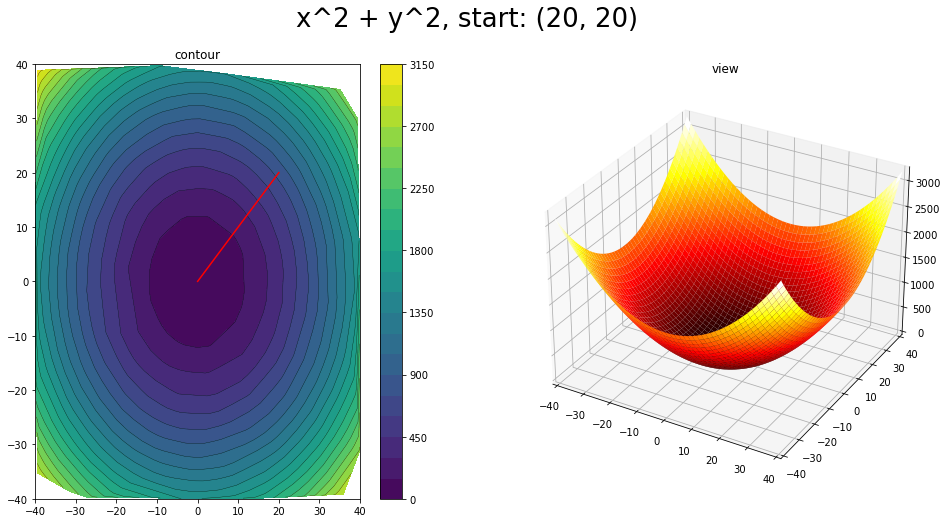

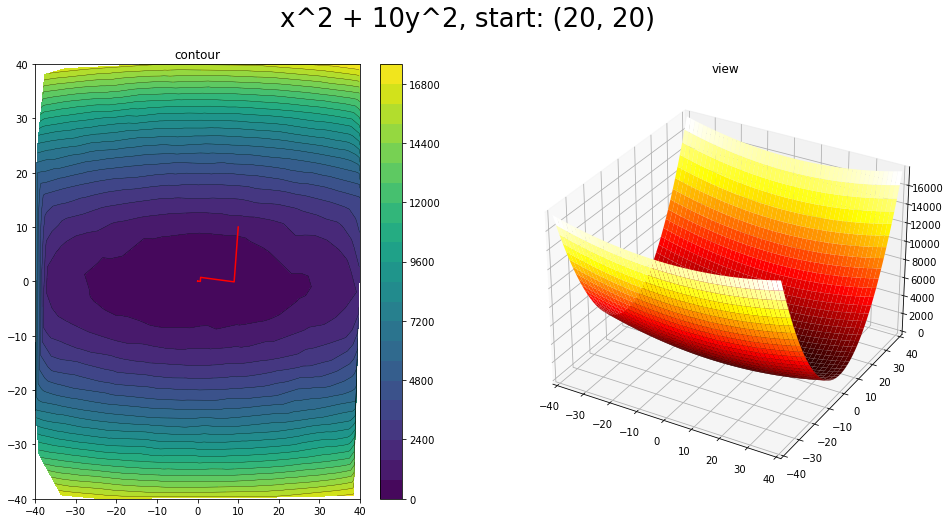

In [ ]:
f = lambda x, y: x ** 2 + y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 2 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (20,20))
trajectory("x^2 + y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "dicho", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 10 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 20 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.0001, d)
g = grad_descent(w, "fixed", (10,10))
trajectory("x^2 + 10y^2, start: (20, 20) - fixed step", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "dicho", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20)", f, -40, 40, -40, 40, g.data)
############################################################
f = lambda x, y: x ** 2 + 100 * y ** 2
d = [
    lambda x, y: 2 * x,
    lambda x, y: 200 * y,
]
w = FunctionWrapper("", f, -math.inf, math.inf, 0.001, d)
g = grad_descent(w, "fixed", (38, 20))
trajectory("x^2 + 100y^2, start: (38, 20) - fixed step", f, -40, 40, -40, 40, g.data)